In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

Text(0, 0.5, 'y')

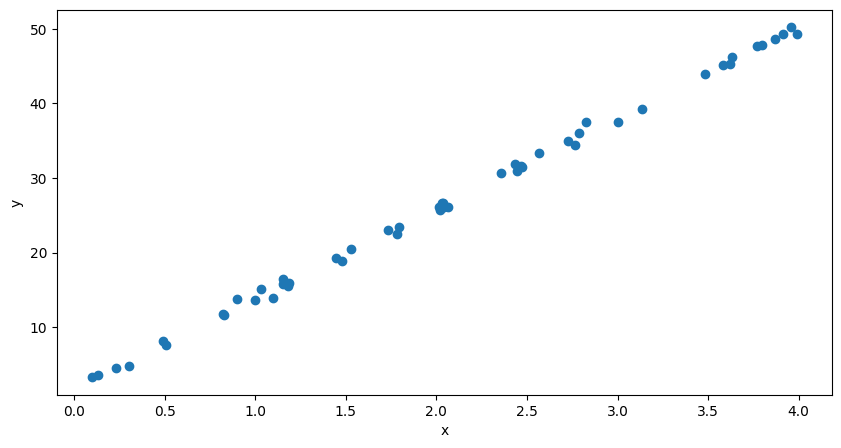

In [19]:
beta_0_true = 2
beta_1_true = 12
tau_true = 3

N = 50
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

In [20]:
def gibbs(y, x, iters,coeficients):
    assert len(y) == len(x)
    for it in range(iters):
        regres.sampleIntercept(x,y)
        for var in coeficients:
            regres.sampleCoeficients(x,y,var)
        regres.sampleTau(x,y)

In [21]:
class BayesianLinearRegression():
    
    def __init__(self,n_params,alpha,beta, tau):
        self.n_params= n_params
        self.dc_coeficients= {"Beta_"+str(i):[0] for i in range(n_params) }
        self.dc_mus= {"Beta_"+str(i):0 for i in range(n_params) }
        self.dc_taus= {"Beta_"+str(i):1 for i in range(n_params) }
        self.dc_columns={"Beta_"+str(i):i-1 for i in range(n_params) }
        self.ls_alpha=[alpha]
        self.ls_beta= [beta]
        self.dc_coeficients["Tau"]= [tau]
        
    def sampleIntercept(self, x,y):
        N = len(y)
        assert len(x) == N
        precision = self.dc_taus["Beta_0"] + self.dc_coeficients["Tau"][-1] * N
        error=y
        ls= [key for key in  self.dc_coeficients.keys()]
        ls.remove("Beta_0")
        ls.remove("Tau")
        for coeficient in ls:
            error -=  self.dc_coeficients[coeficient][-1] * x[:,self.dc_columns[coeficient]]
        mean= self.dc_taus["Beta_0"]* self.dc_mus["Beta_0"] + self.dc_coeficients["Tau"][-1]*np.sum(error)
        mean /= precision
    
        
        self.dc_coeficients["Beta_0"].append(np.random.normal(mean, 1 / np.sqrt(precision)))
    
    def sampleCoeficients(self,x,y,var):
        N = len(y)
        assert len(x) == N
        error=(y- self.dc_coeficients["Beta_0"][-1])*x[:,self.dc_columns[var]]
        precision = self.dc_taus[var] + self.dc_coeficients["Tau"][-1] * np.sum(x[:,self.dc_columns[var]] * x[:,self.dc_columns[var]])
        ls= [key for key in  self.dc_coeficients.keys()]
        ls.remove(var)
        ls.remove("Tau")
        ls.remove("Beta_0")
        for coeficient in ls:
            error -=  self.dc_coeficients[coeficient][-1] * x[:,self.dc_columns[coeficient]]
        mean= self.dc_taus[var]* self.dc_mus[var] + self.dc_coeficients["Tau"][-1]*np.sum(error)
        mean /= precision
        self.dc_coeficients[var].append(np.random.normal(mean, 1 / np.sqrt(precision)))
        
    def sampleTau(self,x,y):
        N = len(y)
        self.ls_alpha.append(self.ls_alpha[0] + N / 2)
        error= y- self.dc_coeficients["Beta_0"][-1]
        ls= [key for key in  self.dc_coeficients.keys()]
        ls.remove("Beta_0")
        ls.remove("Tau")
        for coeficient in ls:
            error-= self.dc_coeficients[coeficient][-1]* x[:,self.dc_columns[coeficient]]
        
        self.ls_beta.append(self.ls_beta[0] + np.sum(error*error)/2)
        self.dc_coeficients["Tau"].append(np.random.gamma(self.ls_alpha[-1], 1/self.ls_beta[-1]))

In [22]:
regres= BayesianLinearRegression(n_params=2,alpha=2,beta=1, tau=2)

In [23]:
coeficients=[key for key in  regres.dc_coeficients.keys()]
coeficients.remove("Beta_0")
coeficients.remove("Tau")
X= x.reshape(-1,1)

In [24]:
gibbs(y,X, 10000, coeficients)

In [25]:
df= pd.DataFrame(regres.dc_coeficients)

<Axes: >

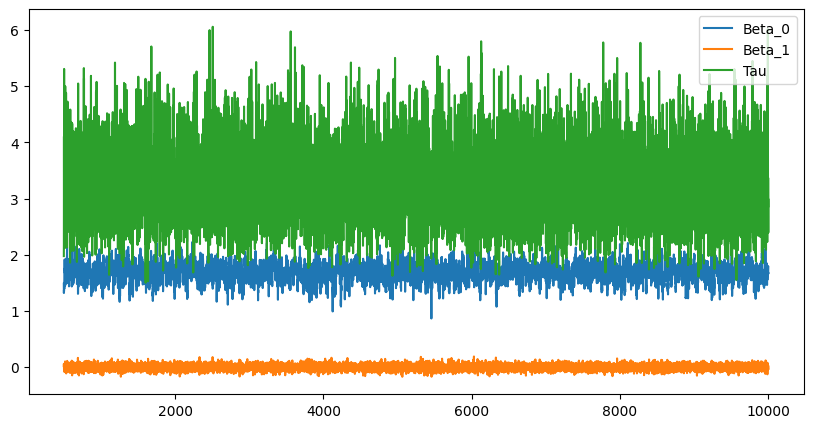

In [26]:
df.iloc[500:,:].plot()

In [27]:
df.iloc[500:,:].describe()

,Beta_0,Beta_1,Tau
count,9501.000000,9501.000000,9501.000000
mean,1.691604,-0.000010,3.255449
std,0.167744,0.048183,0.641200
min,0.867384,-0.169619,1.503169
25%,1.581507,-0.032369,2.808812
50%,1.699209,0.000078,3.208710
75%,1.804668,0.031593,3.663113
max,2.227090,0.191455,6.057471


In [123]:
y

array([-0.71416531, -2.33831888, -2.3745252 , -2.3050854 , -3.39902825,
       -1.28361205, -1.91543761, -2.43041821, -0.69626868, -2.0904854 ,
       -2.37185852, -2.05505491, -0.72624581, -2.1382992 , -2.79861832,
       -1.30537876, -2.11169134, -1.59640124, -2.19265879, -2.13971154,
       -3.19046722, -1.19170081, -1.22769655, -2.09227241, -2.23011683,
       -2.96394898, -2.52256426, -2.26458022, -1.72979761, -2.34917147,
       -1.59609969, -2.93535876, -2.20451089, -1.99494304, -1.11142371,
       -1.46474576, -1.71070048, -2.41112631, -2.49795257, -1.09603601,
       -1.43432257, -1.39788216, -1.65186213, -1.56316421, -1.77652057,
       -1.20411446, -1.89461868, -1.7858887 , -2.64652267, -1.88706032])

In [124]:
regres.dc_coeficients["Beta_0"][-1]

-1.9682037865211188

In [127]:
a=y-regres.dc_coeficients["Beta_0"][-1]

In [126]:
b= 5* X[:,0]

In [129]:
a

array([ 1.25403847, -0.37011509, -0.40632141, -0.33688161, -1.43082447,
        0.68459174,  0.05276617, -0.46221443,  1.27193511, -0.12228162,
       -0.40365473, -0.08685113,  1.24195798, -0.17009542, -0.83041453,
        0.66282503, -0.14348755,  0.37180255, -0.224455  , -0.17150775,
       -1.22226343,  0.77650298,  0.74050724, -0.12406863, -0.26191305,
       -0.99574519, -0.55436047, -0.29637643,  0.23840618, -0.38096769,
        0.3721041 , -0.96715497, -0.23630711, -0.02673925,  0.85678008,
        0.50345802,  0.2575033 , -0.44292253, -0.52974879,  0.87216778,
        0.53388122,  0.57032163,  0.31634165,  0.40503957,  0.19168322,
        0.76408933,  0.07358511,  0.18231509, -0.67831888,  0.08114347])

In [130]:
b

array([ 0.22390405,  2.24675695, 16.26610897,  9.88173922,  6.54620631,
       17.05990633,  6.38182537, 10.43621317, 14.66262079,  0.07930018,
        1.46686467,  0.3314648 ,  6.20807496,  9.19093514,  3.65399863,
        2.28601955,  3.7735228 , 10.00440356, 11.70927114, 16.846361  ,
       10.82488393,  1.05080275,  6.76958981,  5.49045294, 11.1199516 ,
       15.03830926,  9.87131673, 16.50078083,  0.3554444 ,  4.3643105 ,
       11.95067105,  3.43101618, 13.49262133, 11.48402483,  5.08360287,
        6.34963906,  7.79847214, 11.72333601, 19.86394912,  1.81441964,
       16.80020531,  3.91423656, 14.90592444, 11.26759865, 15.63394325,
        6.08260681, 12.04972397,  3.12398627,  9.95489683,  1.83072431])

In [128]:
a-b

array([  1.03013442,  -2.61687205, -16.67243038, -10.21862083,
        -7.97703078, -16.37531459,  -6.3290592 , -10.89842759,
       -13.39068568,  -0.2015818 ,  -1.8705194 ,  -0.41831593,
        -4.96611698,  -9.36103056,  -4.48441316,  -1.62319452,
        -3.91701035,  -9.63260101, -11.93372614, -17.01786875,
       -12.04714736,  -0.27429977,  -6.02908257,  -5.61452156,
       -11.38186464, -16.03405445, -10.42567721, -16.79715725,
        -0.11703822,  -4.74527819, -11.57856695,  -4.39817116,
       -13.72892844, -11.51076408,  -4.22682279,  -5.84618104,
        -7.54096884, -12.16625854, -20.3936979 ,  -0.94225186,
       -16.26632409,  -3.34391493, -14.58958279, -10.86255907,
       -15.44226003,  -5.31851748, -11.97613887,  -2.94167119,
       -10.63321571,  -1.74958084])

In [65]:
Y.shape

(50, 1)